<a href="https://colab.research.google.com/github/roshni27s/Stroke-Prediction/blob/master/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('dark_background')
import math

In [ ]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# dropping id column
data = data.drop("id",axis=1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


### Dataset contains 5110 rows

In [ ]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# checking null values
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### bmi column contains 201 null values

In [ ]:
# filling missing values of bmi with the mean
female_bmi_index = data[(data.gender == 'Female') & (data.bmi.isna())].index
data.loc[female_bmi_index, 'bmi'] = 29

male_bmi_index = data[(data.gender == 'Male') & (data.bmi.isna())].index
data.loc[male_bmi_index, 'bmi'] = 29

In [ ]:
#removing gender = "other" value
other_index = data[data['gender'] =='Other'].index
data = data.drop(other_index)

In [ ]:
# Encoding categorical values
def preprocessing(data):
  data['gender'] = data['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(int)
  data['Residence_type'] = data['Residence_type'].replace({'Rural':0,'Urban':1}).astype(int)
  data['work_type'] = data['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(int)
  data['ever_married'] = data['ever_married'].replace({'Yes':1, 'No':0}).astype(int)
  data['smoking_status'] = data['smoking_status'].replace({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1}).astype(int)

preprocessing(data)
# df['gender'] = df['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
# df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
# df['work_type'] = df['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)
# df['ever_married'] = df['ever_married'].replace({'Yes':1, 'No':0}).astype(np.uint8)
# df['smoking_status'] = df['smoking_status'].replace({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1}).astype(np.uint8)

In [ ]:
data.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,2,1
1,1,61.0,0,0,1,1,0,202.21,29.0,0,1
2,0,80.0,0,1,1,0,0,105.92,32.5,0,1
3,1,49.0,0,0,1,0,1,171.23,34.4,-1,1
4,1,79.0,1,0,1,1,0,174.12,24.0,0,1


In [ ]:
df = data[data['stroke']==1]

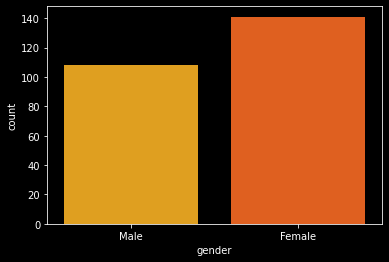

In [ ]:
## 0 denotes male and 1 denotes female
sns.countplot(x='gender',data=df,palette='autumn_r')
plt.show()

## In this dataset, females are more prone to stroke than males

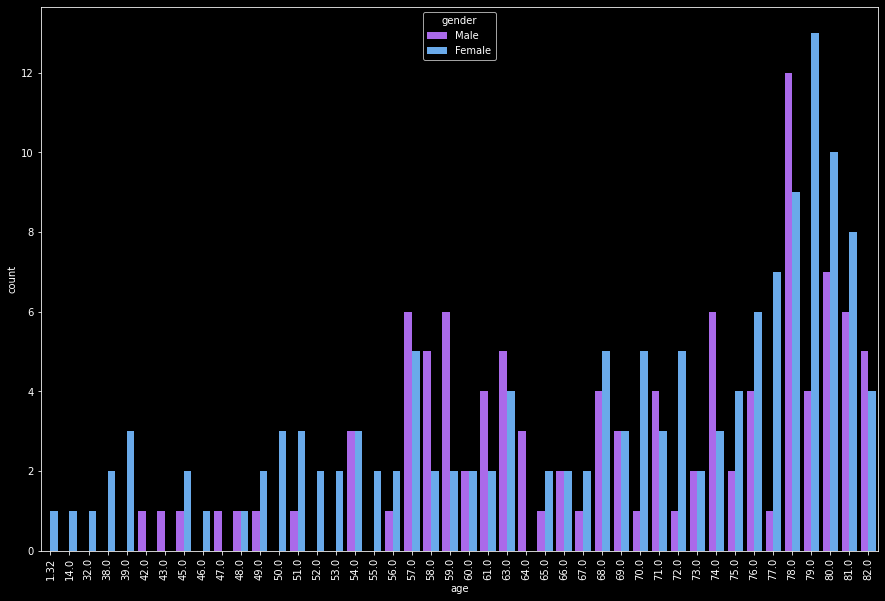

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='age',data=df,hue='gender',palette='cool_r')
plt.xticks(rotation=90)
plt.show()

## Age group 77-81 are more prone to stroke with age 79 being largest.

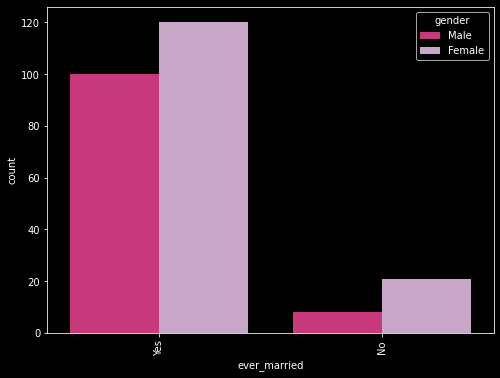

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='ever_married',data=df,hue='gender',palette='PuRd_r')
plt.xticks(rotation=90)
plt.show()

## Married people are more prone to stroke

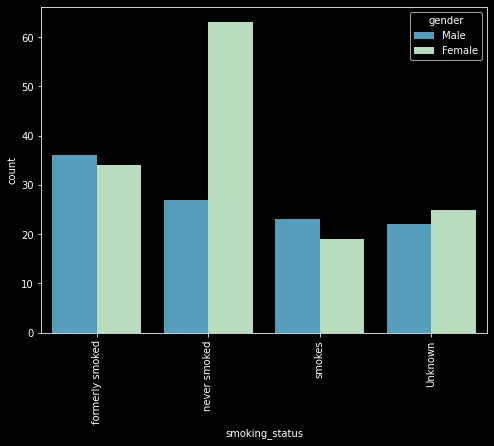

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='smoking_status',data=df,hue='gender',palette='GnBu_r')
plt.xticks(rotation=90)
plt.show()

## Females who never smoked are most prone to stroke

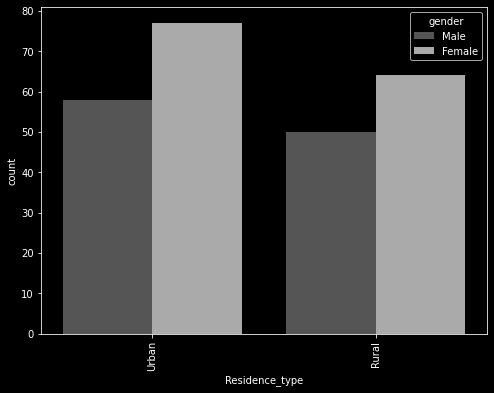

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Residence_type',data=df,hue='gender',palette='gray')
plt.xticks(rotation=90)
plt.show()

## Urban people have more risk of stroke than rural people

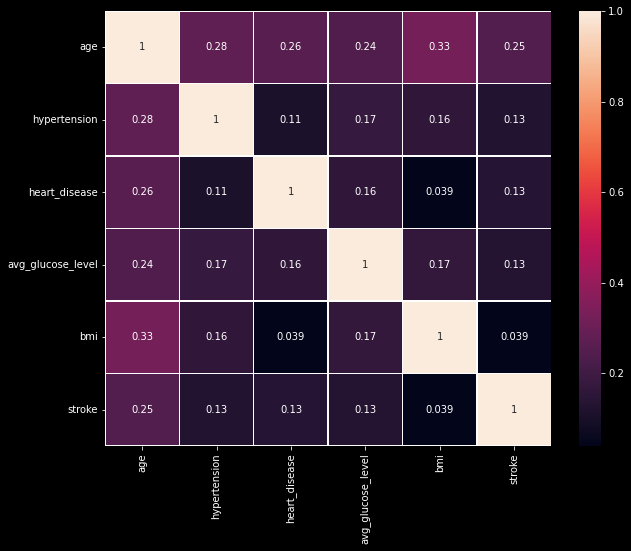

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,linewidths=0.5)
plt.show()

### age is highly correlated with stroke prediction

In [ ]:
# Defining features and target

X = data.drop('stroke', axis=1)
y = data.pop('stroke')

In [ ]:
class Sigmoid():
    def __call__(self, x):
        return 1 / (1 + np.exp(-x))

    def gradient(self, x):
        return self.__call__(x) * (1 - self.__call__(x))

In [ ]:
def make_diagonal(x):
    """ Converts a vector into an diagonal matrix """
    m = np.zeros((len(x), len(x)))
    for i in range(len(m[0])):
        m[i, i] = x[i]
    return m

In [ ]:
class LogisticRegression():
    def __init__(self, learning_rate=.1, gradient_descent=True):
        self.param = None
        self.learning_rate = learning_rate
        self.gradient_descent = gradient_descent
        self.sigmoid = Sigmoid()

    def _initialize_parameters(self, X):
        n_features = np.shape(X)[1]
        # Initialize parameters between [-1/sqrt(N), 1/sqrt(N)]
        limit = 1 / math.sqrt(n_features)
        self.param = np.random.uniform(-limit, limit, (n_features,))

    def fit(self, X, y, n_iterations=4000):
        self._initialize_parameters(X)
        # Tune parameters for n iterations
        for i in range(n_iterations):
            # Make a new prediction
            y_pred = self.sigmoid(X.dot(self.param))
            if self.gradient_descent:
                # Move against the gradient of the loss function with
                # respect to the parameters to minimize the loss
                self.param -= self.learning_rate * -(y - y_pred).dot(X)
            else:
                # Make a diagonal matrix of the sigmoid gradient column vector
                diag_gradient = make_diagonal(self.sigmoid.gradient(X.dot(self.param)))
                # Batch opt:
                self.param = np.linalg.pinv(X.T.dot(diag_gradient).dot(X)).dot(X.T).dot(diag_gradient.dot(X).dot(self.param) + y - y_pred)

    def predict(self, X):
        y_pred = np.round(self.sigmoid(X.dot(self.param))).astype(int)
        return y_pred

In [ ]:
def normalize(X, axis=-1, order=2):
    """ Normalize the dataset X """
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [ ]:
def shuffle_data(X, y, seed=None):
    """ Random shuffle of the samples in X and y """
    if seed:
        np.random.seed(seed)
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    return X[idx], y[idx]

In [ ]:
def train_test_split(X, y, test_size=0.5, shuffle=True, seed=None):
    """ Split the data into train and test sets """
    if shuffle:
        X, y = shuffle_data(X, y, seed)
    # Split the training data from test data in the ratio specified in
    # test_size
    split_i = len(y) - int(len(y) // (1 / test_size))
    X_train, X_test = X[:split_i], X[split_i:]
    y_train, y_test = y[:split_i], y[split_i:]

    return X_train, X_test, y_train, y_test

In [ ]:
def accuracy_score(y_true, y_pred):
    """ Compare y_true to y_pred and return the accuracy """
    accuracy = np.sum(y_true == y_pred, axis=0) / len(y_true)
    return accuracy

In [ ]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.0,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [ ]:
np.shape(X)[1]

10

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 439.1+ KB


In [ ]:
# X = normalize(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=30)

In [ ]:
preprocessing(X_train)
preprocessing(X_test)

In [ ]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2135,0,52.0,0,0,1,0,0,191.66,26.1,-1
3205,0,26.0,0,0,1,1,1,73.72,25.9,-1
3276,1,79.0,0,0,1,1,1,78.32,32.0,1
1801,0,60.0,0,0,0,0,1,84.14,32.3,0
4623,0,25.0,0,0,1,2,1,166.38,23.1,0


In [ ]:
X_train = normalize(X_train)
X_test = normalize(X_test)

In [ ]:
# X_train = normalize(X_train)

In [ ]:


lr = LogisticRegression(gradient_descent=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print ("Accuracy:", accuracy)

Accuracy: 0.9647749510763209
